# Introduction to Qubits

In this notebook we introduce the basic idea of qubits in a format that is friendly for quantum chemists, as such some knowledge of quantum mechanics and linear algebra is assumed. We shall also visualise basic qubits using IBM's qiskit python module. First we shall import all required python modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit as qk

### Classical Bits

Classical computers operate within a binary system. For example, everything can be represented by a 1 or 0. In the binary system, an integer $N$ can be represented by $n$ bits,

$$N = 2^{n-1}b_1 + 2^{n-2} b_2 + \ldots + 2^{0} b_n,$$

where $n$ is determined by the largest power $2^{n-1}$ that is less than $N$. Lets take 52 as an example:

- $2^5 = 32$ is the largest power of 2 possible
- Leaving a remainder of $52 - 32 = 20$
- 20 can be represented in base 2 as $2^4 + 2^2 = 16 + 4$

and therefore,

$$ 52 = 2^{5} 1 + 2^{4} 1 + 2^{3} 0 + 2^{2} 1 + 2^{1} 0 + 2^{0} 0 = 110100,$$

which is comprised of $n = 6$ bits.

We can check this as follows:

In [2]:
num = 52
binary_string = bin(52)
print(binary_string[2:])

110100


### Quantum Bits (Qubits)

Instead of representing information in terms of binary bits, we now turn to a representation based on the idea of state vectors (wavefunctions) in a quantum superposition.

In quantum chemistry we often approximately represent the electronic wavefunction of a molecule in terms of molecule orbitals ($\psi_m$) formed from the linear combination of atomic orbitals ($\phi_i$),

$$\psi_{m} = \sum_i c_i \phi_i.$$

Moreover, the time evolution of a wavepacket (i.e. a superposition of time-independent eigenstates of the Hamiltonian) is of the form,

$$ |\Psi\left(t\right)\rangle = \sum_n e^{\left(-iE_{n}t / \hbar \right)} |\psi_n\rangle,$$

where $\psi_n$ and $E_n$ are the stationary eigenstates and their associated eigenvalues (energies).



#### Basic Definition


In a similar fashion, we define the smallest bit of quanutm information (a qubit) as a simple two level quantum system,

$$|\psi\rangle = c_1 |\phi_1\rangle + c_2 |\phi_2\rangle,$$

where $c_1$ and $c_2$ are the complex expansion coefficients and the orthonormal state vectors $\phi_1\rangle$ and $\phi_2\rangle$ span the 2D Hilbert space on which the qubit $|\psi\rangle$ is defined. The real numbers $|c_1|^2$ and $|c_2|^2$ define the probability of observing the system in each state, and their sum $|c_1|^2 + |c_2|^2 = 1$. Note that here $|\phi\rangle$ just refers to a general quantum state to which we attribute no physical interpretation at the moment.


If you are familiar with quantum mechanics, you may be used to the notation of using $|\psi\rangle$ or $|\phi\rangle$ to denote state vectors. However, we shall instead follow the quantum computing convention of using $|q\rangle$, along with $|0\rangle$ and $|1\rangle$ as orthonormal basis vectors - here one can see the relation to the classical definition of binary bits. Moreover, if a general state vector $|i\rangle$ can only correspond to two values $|0\rangle$ and $|1\rangle$, we simplify $|i\rangle \in \{ |0\rangle, |1\rangle \}$ by instead writing $i \in \{0, 1\}$ (or sometimes $i = 0, 1$). Thus in this notation, if $i, j$ = $0, 1$, then $\langle i | j \rangle = \delta_{ij}$.



#### Hadamard basis

Another useful basis in the context of quantum computing is the Hadamard basis $\{ |+\rangle , |-\rangle \}$, which also spans the Hilbert space of a single qubit $\mathscr{H}_q$. The Hadamard basis vectors can be written in terms of the computational basis vectors $|0\rangle$ and $|1\rangle$ as,

$$ |+\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle, \hspace{2em} |-\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle.$$

As such, the computational basis vectors can also be written in terms of the Hadamard basis,

$$ |0\rangle = \frac{1}{\sqrt{2}} |+\rangle + \frac{1}{\sqrt{2}} |-\rangle, \hspace{2em} |1\rangle = \frac{1}{\sqrt{2}} |+\rangle - \frac{1}{\sqrt{2}} |-\rangle.$$

The state vector of a single qubit is can then be written as $|q\rangle = c_{+} |+\rangle + c_{-} |-\rangle$



#### Bloch Sphere

A single qubit $q$ is a function of two complex numbers (four total numbers), however we can reduce this to be a function of two variables by a change of variables. For this we introduce $\theta$ and $\phi$ with $\theta \in [0, \pi]$ and $\phi \in [0, 2\pi]$, now the complex expansion coefficients can be written as,

$$ |c_0|  = \cos(\theta/2), \hspace{2em} |c_1| = \sin(\theta/2) $$

Now the single qubit state vector can be represented on a Bloch sphere with spherical coordinates $(\theta, \phi)$, and is defined by,

$$ |q(\theta, \phi)\rangle = \cos(\theta/2) |0\rangle + e^{i\phi} \sin(\theta/2) |1\rangle,$$

where $|q(0, 0)\rangle = |0\rangle$ and $|q(\pi, 0)\rangle = |1\rangle$ - i.e. the computational basis vectors span the north $(+z)$ and south $(-z)$ poles of the Bloch sphere. The Hadamard basis vectors now span the $+x$ and $-x$ axes of the Bloch sphere, and are defined as,

$$|q(\pi/2, 0)\rangle = \frac{1}{2} |0\rangle + \frac{1}{2} |1\rangle = |+\rangle,$$
and
$$|q(\pi/2, \pi)\rangle = \frac{1}{2} |0\rangle - \frac{1}{2} |1\rangle = |-\rangle$$ 


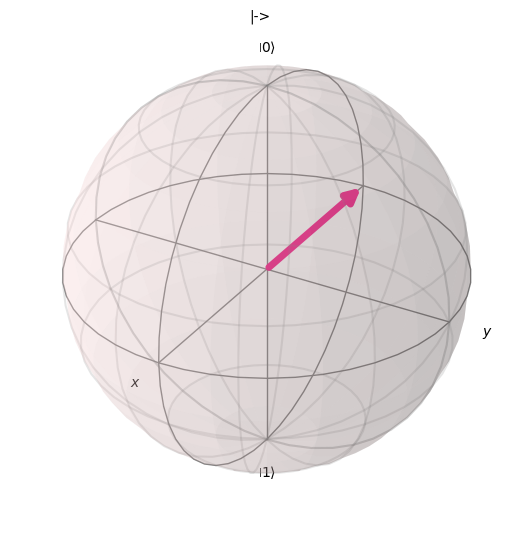

In [2]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, np.pi/2, 0], coord_type='spherical', title='|+>') # plot Hadamard basis vectors
plot_bloch_vector([1, np.pi/2, np.pi], coord_type='spherical', title='|->')

### Multiple Qubits

While a single qubit spans a 2D Hilbert space, two qubits span a space that is the tensor product of two 2D Hilbert spaces, $|q_2\rangle \in \mathcal{H}_{q2} = \mathcal{H}_{q1} \otimes \mathcal{H}_{q^{\prime}1} = \mathbb{C}^{2^2}$.

This is the same as the represenation of an $N$ dimensional wavefunction in direct product form within discrete variable representation in quantum chemistry. Here, assuming a basis of orthonormal coordinates, the $N$ dimensional wavefunction is represented as a tensor product of $N$ 1D basis functions. For example in 2D, KE matrix elements are then evaluated as,

$$ \langle \Phi_{i^{\prime} j^{\prime}} | T | \Phi_{ij} \rangle =  \langle \phi_{i^{\prime}} | T_x | \phi_{i} \rangle \otimes \delta_{jj^{\prime}} + \delta_{ii^{\prime}} \otimes \langle \phi_{j^{\prime}} | T_y | \phi_{j} \rangle $$

In quantum computing, we rewrite the state vector of a two qubit system as,

$$ | q_{2}\rangle = a_{00}|00\rangle + a_{01} |01\rangle + a_{10} |10\rangle + a_{11}|11\rangle = \sum_{i,j} a_{ij} |i\rangle \otimes |j\rangle = \sum_{i,j} a_{ij} |ij\rangle,  $$

where $i,j = 0,1$. Here the first element of the ket $|ij\rangle$ represents a computational basis vector of $\mathcal{H}_{q1}$, and the second element a vector of $\mathcal{H}_{q^{\prime}1}$. The orthonormal states $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ form the computational basis of $\mathcal{H}_{q2}$.

In the general case of a $n$ qubit system the state vector is defined as,

$$ |q_n \rangle = \sum_{i_{1}, \ldots, i_{n}} a_{i_{1},\ldots,i_{n}} |i_{1},i_{2} \ldots i_{n} \rangle $$,

where the complex coefficients satisfy the normalisation condition, $\sum |a_{i_{1},\ldots,i_{n}}|^2 = 1$ - akin to the normalisation condition of a quantum wavepacket. This $n$ qubit system is then defined on a Hilbert space $\mathcal{H}_n$ that is a tensor product of $n$ 2D Hilbert spaces $\mathcal{H}_2$, and thus $|q_n \rangle \in \left( \mathbb{C}^{2} \right)^{n}$. Note, we often write the $n$ qubit state $|q_n \rangle$ as $|Q\rangle$.

The state of a qubit $|Q\rangle$ is entangled if it cannot be written as a tensor product of individual qubit states - i.e. it can not be factorised. For example, two single qubit states $|q\rangle$ and $| q^{\prime}\rangle$ are entangled when $a_{ij} \neq a_i a^{\prime}_{j}$ in,

$$ |q\rangle |q^{\prime}\rangle = \sum_{ij} a_{i} a^{\prime}_{j} |ij\rangle $$.

Consider for example, the two qubit state $1/ \sqrt{2} (|00\rangle + |11 \rangle)$. First we write the full expression for a two qubit state assuming it is a product state,

$$|q_2 \rangle = a_0 b_0 |00 \rangle + a_0 b_1 |01\rangle + a_1 b_0 |10\rangle + a_1 b_1 |11\rangle$$,

for this to be a non-entangled state we require $a_0 b_0 = 1/\sqrt{2}$, $a_1 b_1 = 1/\sqrt{2}$, and both $a_0 b_1$ and $a_1 b_0 = 0$. However if either $a_0$ or $a_1$ are zero, then $|00\rangle$ or $|11\rangle$ are zero. The same is true when $b_0$ or $b_1$ are zero, and therefore the state $1/ \sqrt{2} (|00\rangle + |11 \rangle)$ must be an entangled state.

Generally, we may check if a given state is entangled by checking if the coefficient matrix $A$ of a qubit $|Q\rangle$ has a non-zero determinant. For example, the coefficient matrix of $1/ \sqrt{2} (|00\rangle + |11 \rangle)$ is,

$$  \[
A = \begin{bmatrix}
\frac{1}{\sqrt{2}} & 0 \\
0 & \frac{1}{\sqrt{2}}
\end{bmatrix}
\]
$$

and the determinant is,

$$\mathrm{det}(A) = \left(\frac{1}{\sqrt{2}} \times \frac{1}{\sqrt{2}} \right) - (0 \times 0) = \frac{1}{2} \neq 0$$

and thus the state is entangled.



In [20]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

simulator = Aer.get_backend('statevector_simulator')

# Define the entangled state
def entangled_state():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

# Define the separable state (Product state)
def separable_state():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    return qc

def check_entanglement(qc):
    result = simulator.run(qc).result()
    statevector = result.get_statevector()
    coeff_matrix = statevector.data.reshape((2, 2))
    determinant = np.linalg.det(coeff_matrix)
    
    print("\nChecking if state is entangled:") 
    print("Coefficient matrix: \n", coeff_matrix)
    print("Determinant of the matrix: ", determinant)
    
    if determinant != 0:
        print("The state is entangled.")
    else:
        print("The state is separable.")

entangled_qc = entangled_state()
separable_qc = separable_state()
check_entanglement(separable_qc)
check_entanglement(entangled_qc)



Checking if state is entangled:
Coefficient matrix: 
 [[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
Determinant of the matrix:  0j
The state is separable.

Checking if state is entangled:
Coefficient matrix: 
 [[0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j]]
Determinant of the matrix:  (0.49999999999999994+0j)
The state is entangled.


### Single Qubit Gates

In classical binary computing operations are expressed through function mappings that transform an input into an output. Complex operations are decomposed into a concatenation of elementary Boolean logic gates such as the NOT, AND, and OR gates. To introduce how quantum circuits are built, we shall first recall the time evolution operator $U(t, t_0)$, a unitary operator that propogates a wavefunction or wavepacket from an initial state at time $t_0$ to another state at time $t$,

$$ |\psi(t)\rangle = U(t,t_0 ) |\psi (t_0) \rangle ,$$

which (providing a time-independent Hamiltonian) takes the form of,

$$ U(t, t_0 ) = e^{-i Ht / \hbar}. $$

In light of this, one can write similar unitary transformations of an $n$ qubit system in an initial state $|Q_0 \rangle$ to a final state $|Q_f \rangle$ as,
 
$$ |Q_f \rangle = U |Q_0 \rangle. $$

In the single qubit case $U$ represents a single unitary transform on a state, known as a quantum logic gate.

In the computational basis the state vector of a single qubit has the column vector form,

$$ \[
|q\rangle = a_0
\begin{bmatrix} 
1 \\ 
0 
\end{bmatrix} 
+ a_1
\begin{bmatrix} 
0 \\ 
1 
\end{bmatrix} 
=
\begin{bmatrix} 
a_0 \\ 
a_1 
\end{bmatrix}
\]. $$

The evolution of this single qubit state to another later state is represented by the matrix,

$$ \[
U =
\begin{bmatrix} 
U_{00} & U_{01} \\ 
U_{10} & U_{11} 
\end{bmatrix}
\]. $$

For now the matrix $U$ represents an arbitrary quantum gate where upon application to the qubit $|q\rangle$, the state of the qubit on the other side of the gate is,

$$ U|q\rangle = \begin{bmatrix} 
U_{00} a_{00} & U_{01} a_{01} \\ 
U_{10} a_{10} & U_{11} a_{11}
\end{bmatrix}
\].  $$

The elements of the $2 \times 2$ matrix associate to a single-qubit gate are,

$$ \[ U = \begin{bmatrix} 
\langle 0|U |0\rangle & \langle 0 | U | 1 \rangle \\ 
\langle 1|U |0\rangle & \langle 1 | U | 1 \rangle
\end{bmatrix}
\].  $$


More generally, the state of a qubit after application of a gate is,

$$ U|q\rangle = \sum_{ij} a_j U_{ij} |i\rangle.$$

The state of a qubit following two gates is then,

$$ U_2 U_1 |q\rangle = \sum_{ijk} a_j U_{2,ik} U_{1,kj} |i\rangle,$$

and for $N$ consecutive gates,

$$  \[
U_N U_{N-1} \dots U_1 |q\rangle =
\sum_{i, j_1, j_2, \dots, j_{N-1}} \alpha_{j_1} 
U_{N, i j_{N-1}} U_{N-1, j_{N-1} j_{N-2}} \dots U_{1, j_1 j_0} |i\rangle
\].$$


#### Pauli Matrices as Gates

The Pauli matrices not only play an important role in physics, but are also the foundation of quantum logic. To recap the matrices are defined as,

$$
\[
\sigma_X = X =
\begin{bmatrix} 
0 & 1 \\ 
1 & 0 
\end{bmatrix},
\quad
\sigma_Y = Y =
\begin{bmatrix} 
0 & -i \\ 
i & 0 
\end{bmatrix},
\quad
\sigma_Z = Z =
\begin{bmatrix} 
1 & 0 \\ 
0 & -1 
\end{bmatrix}.
\]
$$

Here will refer to the Pauli matrices as $X, Y, Z$ gates.

Let us now examine how the Pauli matrices transform the computational basis vectors of a single qubit,

$$
\[
X|0\rangle =
\begin{bmatrix} 
0 & 1 \\ 
1 & 0 
\end{bmatrix} 
\begin{bmatrix} 
1 \\ 
0 
\end{bmatrix}
=
\begin{bmatrix} 
0 \\ 
1 
\end{bmatrix}
= |1\rangle, \quad
X|1\rangle =
\begin{bmatrix} 
0 & 1 \\ 
1 & 0 
\end{bmatrix} 
\begin{bmatrix} 
0 \\ 
1 
\end{bmatrix}
=
\begin{bmatrix} 
1 \\ 
0 
\end{bmatrix}
= |0\rangle,
\]
$$

$$
\[
Y|0\rangle =
\begin{bmatrix} 
0 & -i \\ 
i & 0 
\end{bmatrix} 
\begin{bmatrix} 
1 \\ 
0 
\end{bmatrix}
=
\begin{bmatrix} 
0 \\ 
i 
\end{bmatrix}
= i|1\rangle, \quad
Y|1\rangle =
\begin{bmatrix} 
0 & -i \\ 
i & 0 
\end{bmatrix} 
\begin{bmatrix} 
0 \\ 
1 
\end{bmatrix}
=
\begin{bmatrix} 
- i \\ 
0 
\end{bmatrix}
= -i|0\rangle,
\]
$$

$$
\[
Z|0\rangle =
\begin{bmatrix} 
1 & 0 \\ 
0 & -1 
\end{bmatrix} 
\begin{bmatrix} 
1 \\ 
0 
\end{bmatrix}
=
\begin{bmatrix} 
1 \\ 
0 
\end{bmatrix}
= |0\rangle, \quad
Z|1\rangle =
\begin{bmatrix} 
1 & 0 \\ 
0 & -1 
\end{bmatrix} 
\begin{bmatrix} 
0 \\ 
1 
\end{bmatrix}
=
\begin{bmatrix} 
0 \\ 
-1 
\end{bmatrix}
= -|1\rangle.
\]

$$

Each of the Pauli matrices correspond to a rotation of $\pi$ around its respective axis on the Bloch sphere.

- $X$ - flips qubit around the $x$ axis, swapping $|0\rangle$ and $|1\rangle$
- $Y$ - flips qubit around the $y$ axis, corresponding to a phase shift
- $Z$ - flips qubit around the $z$ axis, leaving $|0\rangle$ unchanged but flipping $|1\rangle$'s phase


 Here it obvious why the $X$ gate is often referred to as the bit flip gate, or a NOT gate in quantum computing.

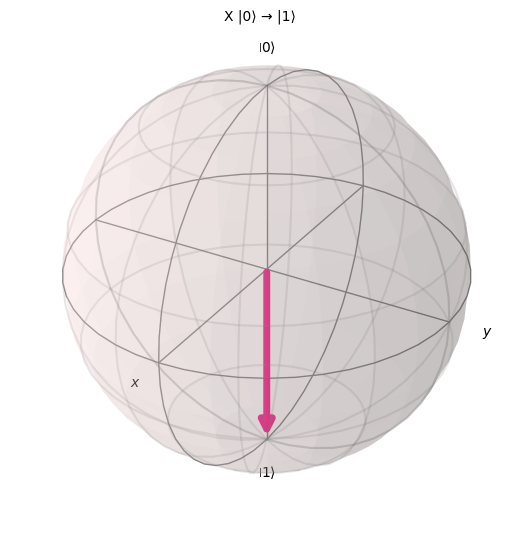

In [54]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to compute the Bloch vector from a statevector
def compute_bloch_vector(statevector):
    # Extract the statevector (complex amplitudes)
    amplitudes = statevector.data
    # For a single qubit, we expect 2 components: [alpha, beta]
    alpha, beta = amplitudes[0], amplitudes[1]
    # Calculate Bloch vector components (x, y, z)
    x = 2 * np.real(alpha * np.conj(beta))
    y = 2 * np.imag(alpha * np.conj(beta))
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return np.array([x, y, z])

# Create circuits for |0> and apply Pauli matrices
qc_X = QuantumCircuit(1)
qc_X.x(0)

qc_Y = QuantumCircuit(1)
qc_Y.y(0)

qc_Z = QuantumCircuit(1)
qc_Z.x(0) # starts from |1>
qc_Z.z(0)

state_X = Statevector.from_instruction(qc_X)
state_Y = Statevector.from_instruction(qc_Y)
state_Z = Statevector.from_instruction(qc_Z)

bloch_X = compute_bloch_vector(state_X)
plot_bloch_vector(bloch_X, coord_type='cartesian', title="X |0⟩ → |1⟩")


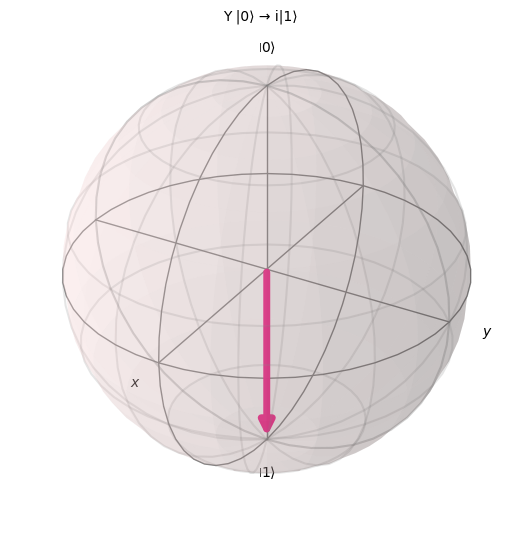

In [55]:
bloch_Y = compute_bloch_vector(state_Y)
plot_bloch_vector(bloch_Y, title="Y |0⟩ → i|1⟩")

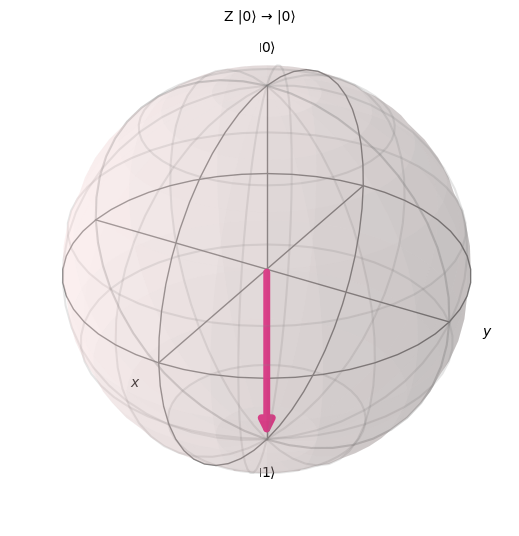

In [56]:
bloch_Z = compute_bloch_vector(state_Z)
plot_bloch_vector(bloch_Z, title="Z |0⟩ → |0⟩")